# Тест №3: Геострофический баланс

In [74]:
%load_ext autoreload
%autoreload 2

from state import State
from domain import Domain
from swe_operators import SweAdvectiveFormOperator
from time_schemes import rk4
from initial_conditions import gaussian_hill, barotropic_instability, geostrophic_balance
import operators as op
from vizualization import trisurf_field, animate_trisurf, surf_interpolated_field, animate_interpolated_surf, \
                          animate_tripcolor, tripcolor_field, imshow_interpolated_field

import numpy as np
import matplotlib.pyplot as plt
from vecmath import calc_mass
from matplotlib           import animation
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
# definition of computational domain constants
RADZ = 6371.22 * 1000.0 # "Earth" radii in meters
GRAV = 9.80616 # "Earth" gravity acceleration in m * s**(-2)
OMEGA = 7.292 * 10**(-5) # "Earth" angular velocity in rad * s**(-1)
PCORI = 2 * OMEGA # Coriolis parameter
H_MEAN = 10 * 1000.0 # "Earth" mean atmosphere depth
C_GRAV = np.sqrt(GRAV * H_MEAN) # Gravity wave speed
LX = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]
LY = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]

In [79]:
%%time
import time
from IPython.display import display, clear_output

domains = [Domain(xs = 0.0,    xe = LX / 2, nx = 32 * 2, ys = 0.0, ye = LY, ny = 64,  lx=LX, ly=LY), \
           Domain(xs = LX / 2, xe = LX    , nx = 32, ys = 0.0, ye = LY, ny = 64,  lx=LX, ly=LY)]

state21 = gaussian_hill(domains, H_MEAN)
state42 = gaussian_hill(domains, H_MEAN)
swe_operator21 = SweAdvectiveFormOperator(g=GRAV, pcori=0.0, diff_method = op.diff_sbp21)
swe_operator42 = SweAdvectiveFormOperator(g=GRAV, pcori=0.0, diff_method = op.diff_sbp42)

T = 5 * 24 * 3600
Nt = 2 * 150
dt = T / Nt

states_list21 = [state21]
states_list42 = [state42]

for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+str(k))
    state21 = rk4(state21, swe_operator21, dt, domains)
    state42 = rk4(state42, swe_operator42, dt, domains)
    states_list21.append(state21)
    states_list42.append(state42)
h_list21 = [state21.h for state21 in states_list21]
h_list42 = [state42.h for state42 in states_list42]

'Time step 300'

CPU times: user 14.3 s, sys: 1.21 s, total: 15.5 s
Wall time: 15.1 s


<IPython.core.display.Javascript object>


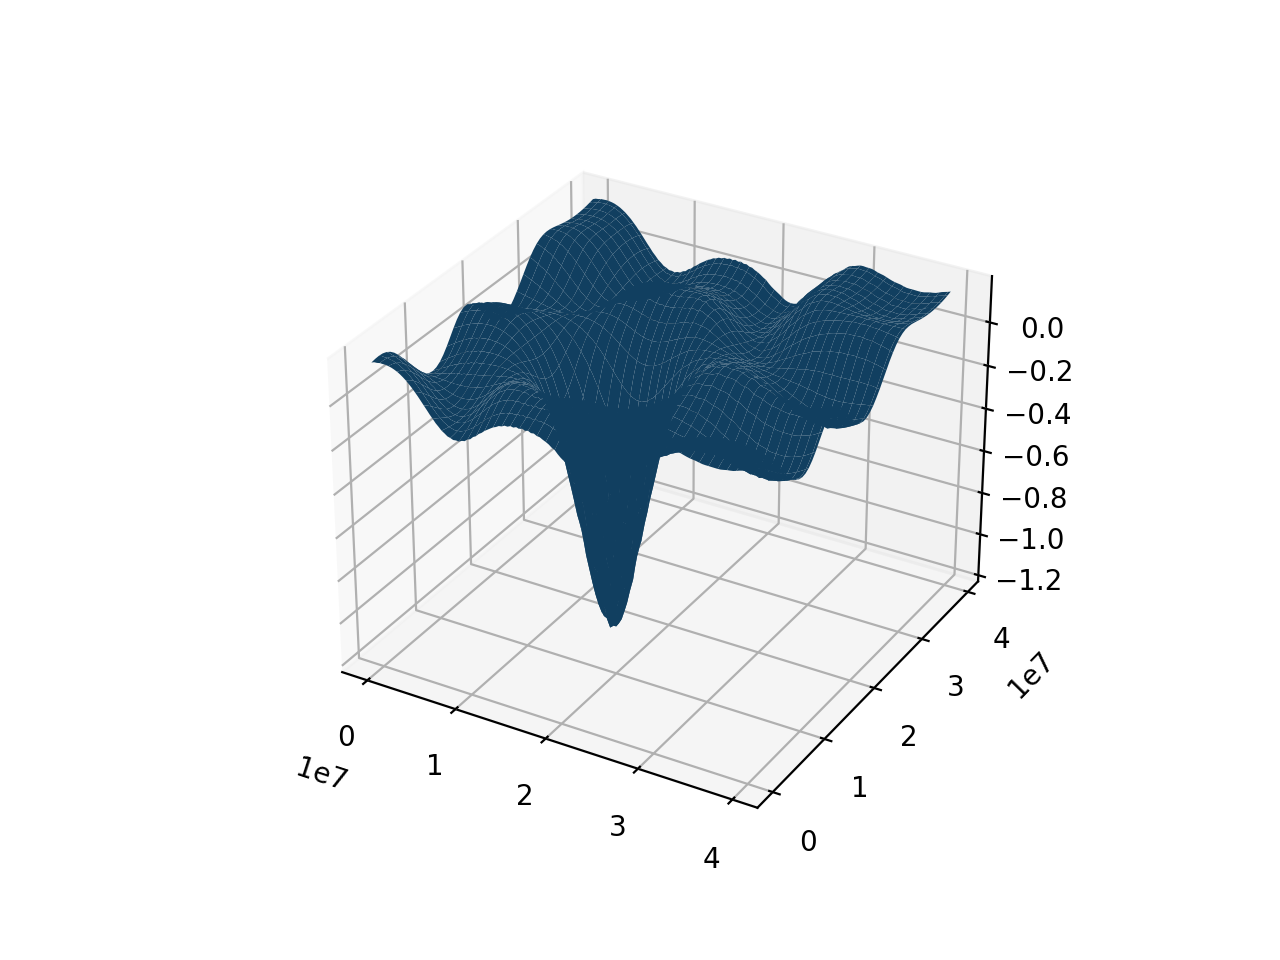

In [80]:
surf_interpolated_field(states_list21[-1].h - states_list21[0].h, domains)

<IPython.core.display.Javascript object>


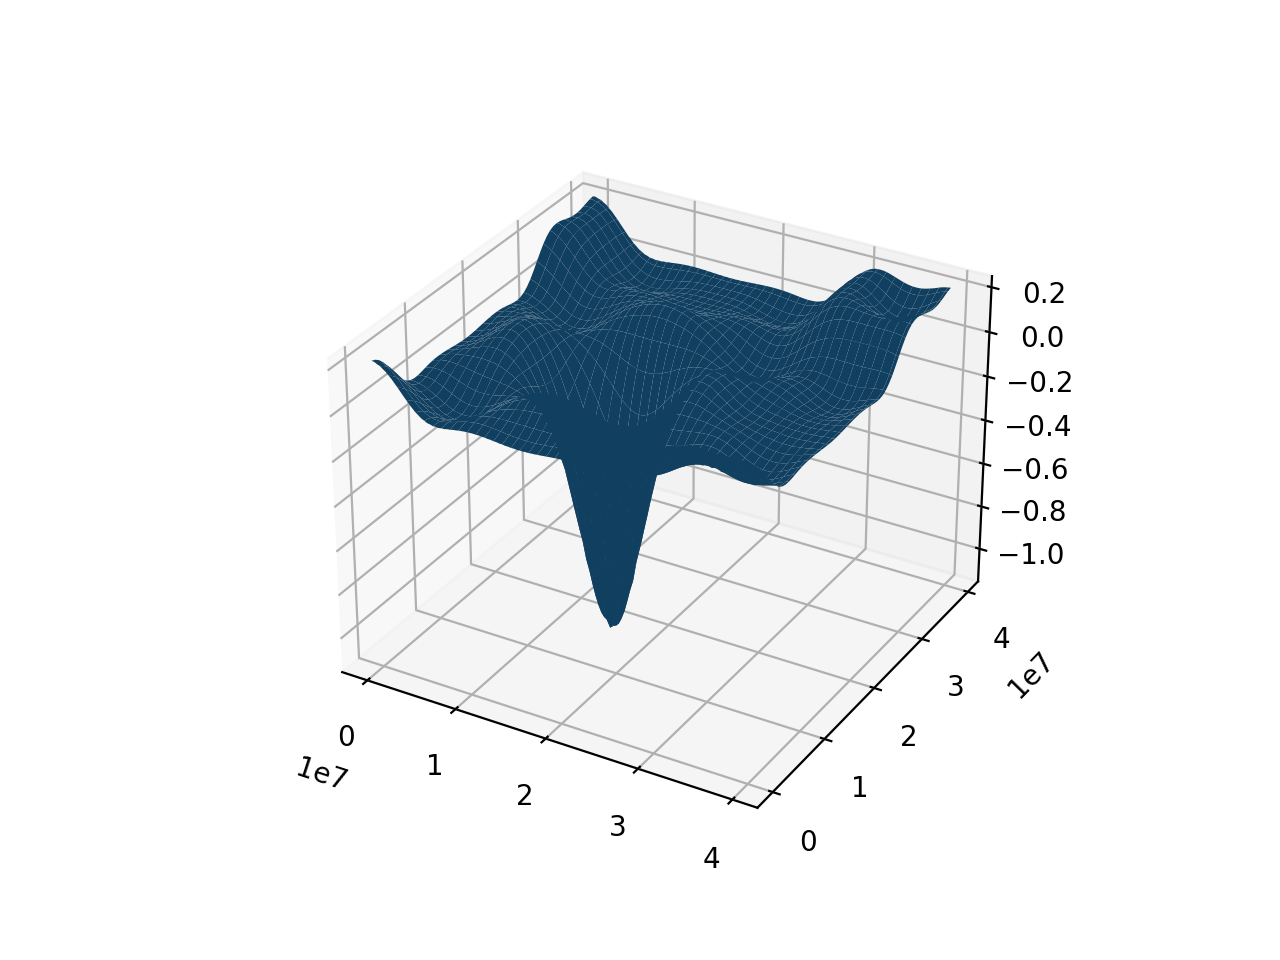

In [81]:
surf_interpolated_field(states_list42[-1].h - states_list42[0].h, domains)

In [82]:
%%time
import time
from IPython.display import display, clear_output

domains = [Domain(xs = 0.0,    xe = LX / 2, nx = 64 * 2 , ys = 0.0, ye = LY, ny = 128,  lx=LX, ly=LY), \
           Domain(xs = LX / 2, xe = LX    , nx = 64, ys = 0.0, ye = LY, ny = 128,  lx=LX, ly=LY)]

state21 = gaussian_hill(domains, H_MEAN)
state42 = gaussian_hill(domains, H_MEAN)
swe_operator21 = SweAdvectiveFormOperator(g=GRAV, pcori=0.0, diff_method = op.diff_sbp21)
swe_operator42 = SweAdvectiveFormOperator(g=GRAV, pcori=0.0, diff_method = op.diff_sbp42)

T = 5 * 24 * 3600
Nt = 4 * 150 
dt = T / Nt

states_list21 = [state21]
states_list42 = [state42]

for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+str(k))
    state21 = rk4(state21, swe_operator21, dt, domains)
    state42 = rk4(state42, swe_operator42, dt, domains)
    states_list21.append(state21)
    states_list42.append(state42)
h_list21 = [state21.h for state21 in states_list21]
h_list42 = [state42.h for state42 in states_list42]

'Time step 600'

CPU times: user 57.8 s, sys: 4.96 s, total: 1min 2s
Wall time: 1min 1s


<IPython.core.display.Javascript object>


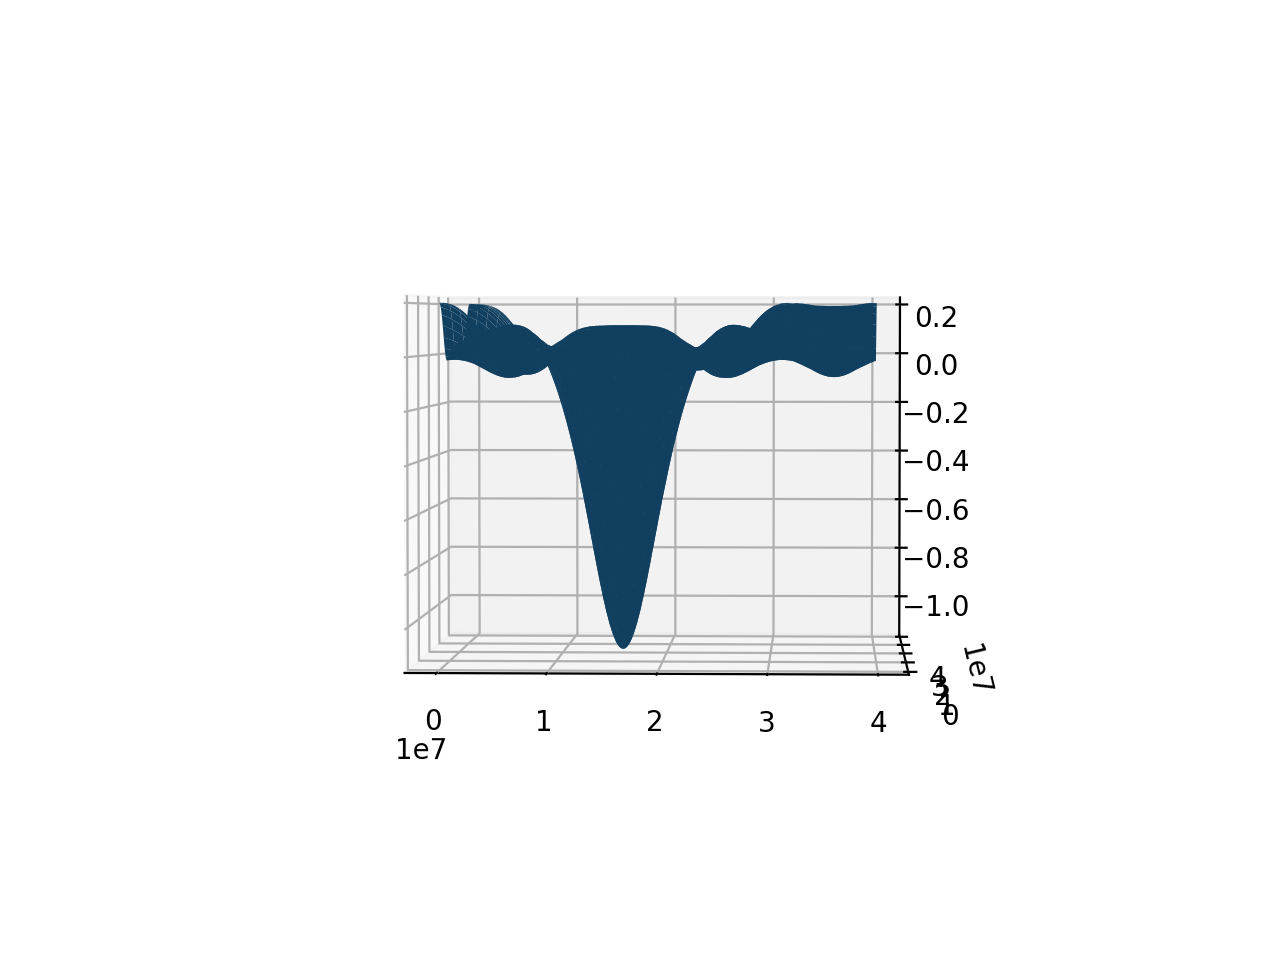

In [86]:
surf_interpolated_field(states_list21[-1].h - states_list21[0].h, domains)

<IPython.core.display.Javascript object>


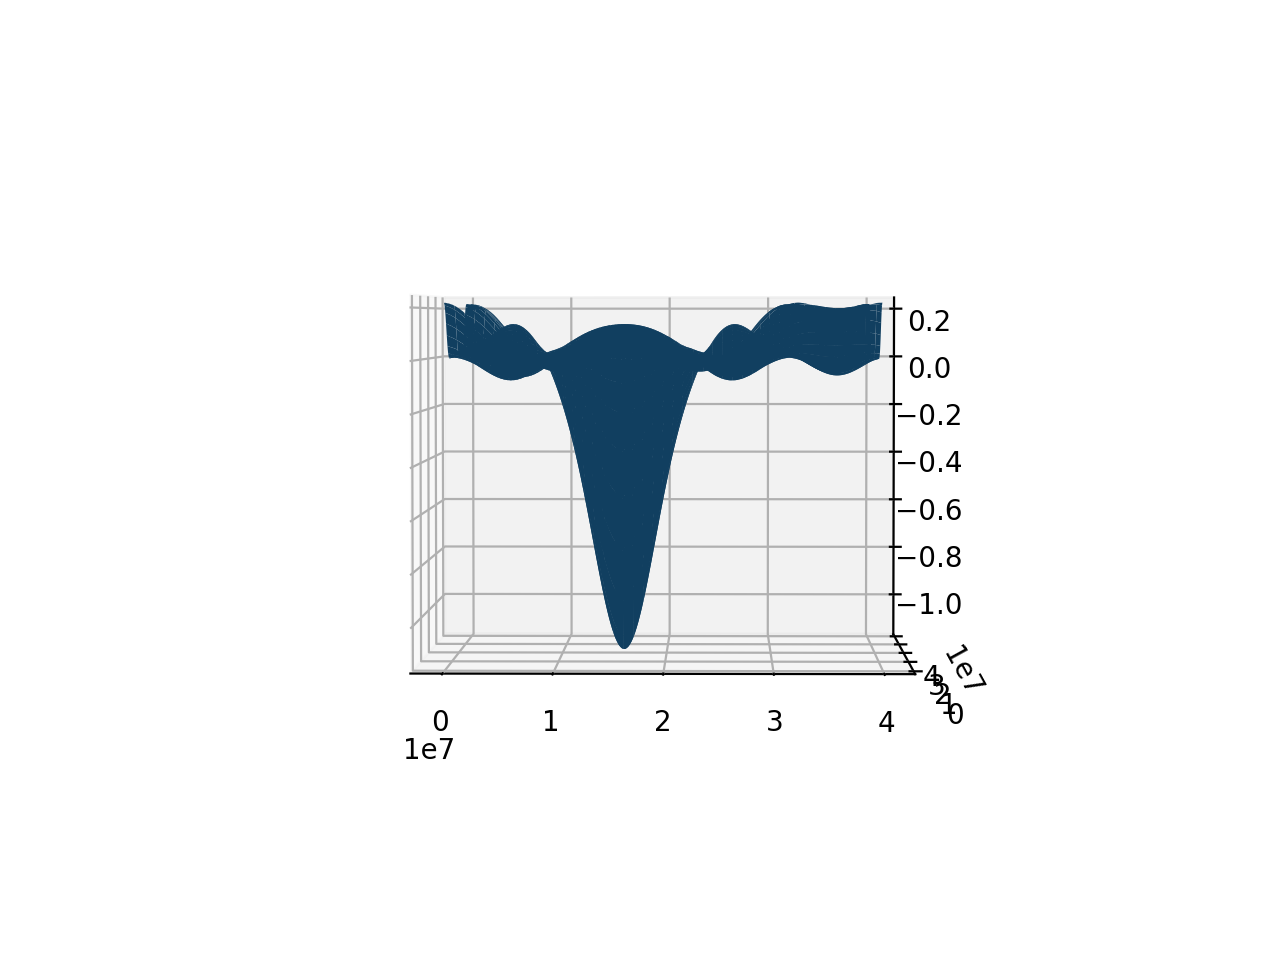

In [85]:
surf_interpolated_field(states_list42[-1].h - states_list42[0].h, domains)